# 연습문제(2)

패키지 설치

In [32]:
from pandas import read_excel, DataFrame, unique
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
import sys
import os
import numpy as np
from sklearn.impute import SimpleImputer
from statsmodels.graphics.mosaicplot import mosaic

In [17]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [25]:
df = read_excel("https://data.hossam.kr/D02/wage.xlsx")
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


## 1.데이터를 로드하여 명목형 변수를 1, 2 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인

### 데이터프레임 크기

In [19]:
df.shape

(3000, 11)

### 데이터 유형

In [20]:
df.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

### 특정 변수의 데이터 종류 파악

In [21]:
# df.value_counts("maritl")
df['maritl'].value_counts()

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64

In [23]:
# # unique도 가능
# df.maritl.unique()

In [24]:
vc = df['maritl'].value_counts()
vc

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64

## 2.레이블링 된 명목형 변수를 category 타입으로 변경

## 3.수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

In [47]:
df3 = read_excel("https://data.hossam.kr/D02/wage.xlsx")
df3

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [48]:
re_df3 = df3.describe().drop(columns="year")
re_df3

,age,logwage,wage
count,3000.000000,3000.000000,3000.000000
mean,42.414667,4.653905,111.703608
std,11.542406,0.351753,41.728595
min,18.000000,3.000000,20.085537
25%,33.750000,4.447158,85.383940
50%,42.000000,4.653213,104.921507
75%,51.000000,4.857332,128.680488
max,80.000000,5.763128,318.342430


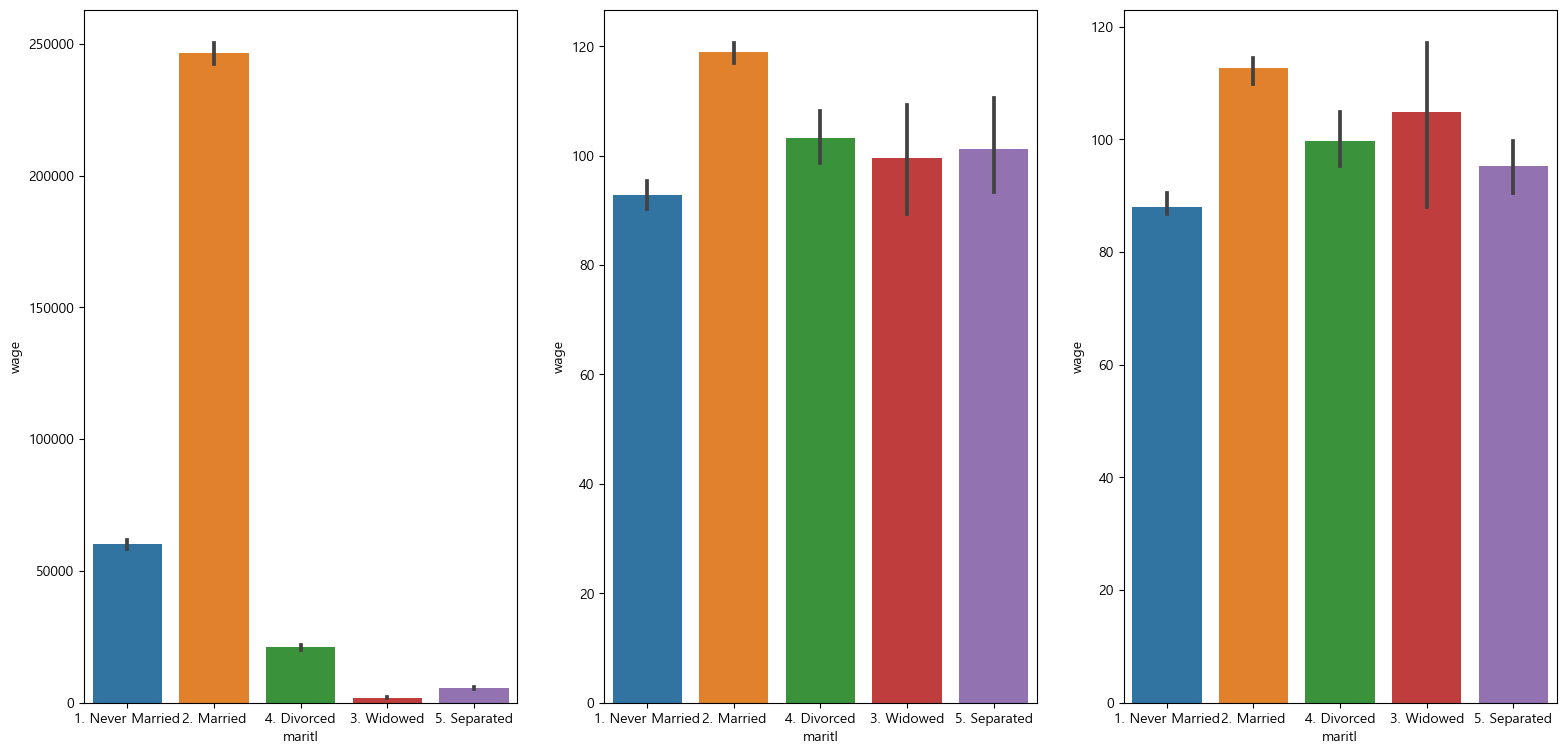

In [49]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(19,9))
# fig.subplots_adjust(wspace=0.2, hspace=0.2)
#-----<ax1>-----#
sb.barplot(data=df3, x='maritl', y='wage', estimator='sum', ax=ax1)
# ax1.title.set_text("국내 상장사의 외국(F), 국내(K)별 주가 가치의 합계")
ax1.title.set_fontsize(10)
ax1.title.set_color("#ff0000")
#-----<ax2>-----#
sb.barplot(data=df3, x='maritl', y='wage', estimator='mean', ax=ax2)
# ax1.title.set_text("국내 상장사의 외국(F), 국내(K)별 주가 가치의 합계")
ax1.title.set_fontsize(10)
ax1.title.set_color("#ff0000")
#-----<ax3>-----#
sb.barplot(data=df3, x='maritl', y='wage', estimator='median', ax=ax3)
# ax1.title.set_text("국내 상장사의 외국(F), 국내(K)별 주가 가치의 합계")
ax1.title.set_fontsize(10)
ax1.title.set_color("#ff0000")

## 4.명목형 변수에 대한 기술 통계를 수행하고 설명하시오.

## 5.결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

## 6.교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

## 7.직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

## 8.교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오

In [27]:
cdf = df.copy()
edf = cdf.filter(['education', 'race'])
edf

,education,race
0,1. < HS Grad,1. White
1,4. College Grad,1. White
2,3. Some College,1. White
3,4. College Grad,3. Asian
4,2. HS Grad,1. White
...,...,...
2995,3. Some College,1. White
2996,2. HS Grad,1. White
2997,1. < HS Grad,2. Black
2998,3. Some College,1. White


### catplot 사용

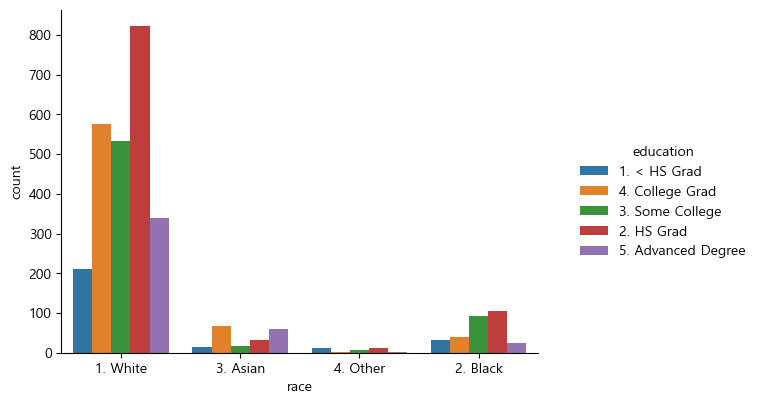

In [31]:
g = sb.catplot(data=df,
               x='race',
               hue='education',
               kind='count')
g.fig.set_figwidth(8)
g.fig.set_figheight(4)
plt.show()
plt.close()

### 모자이크 그래프

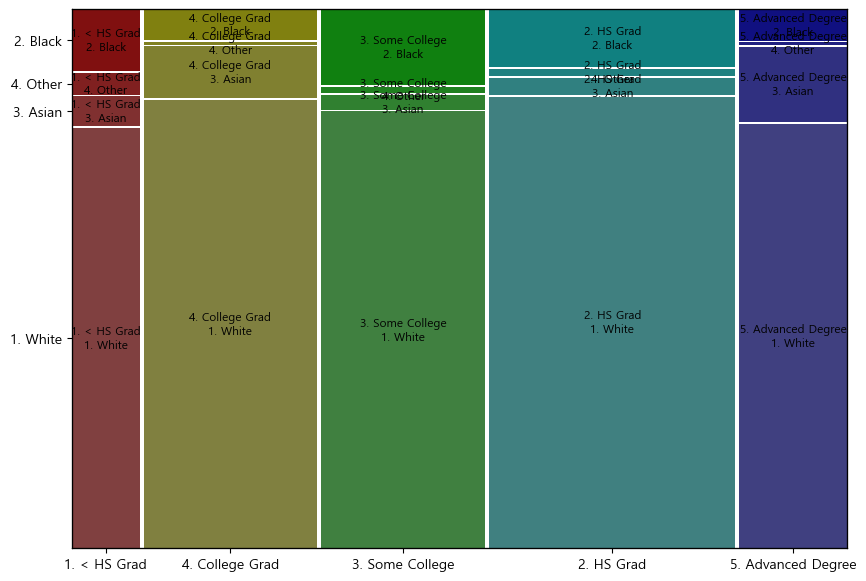

In [35]:
plt.rcParams["figure.figsize"] = (10, 7)
mosaic(edf,['education', 'race'])
plt.show()
plt.close()